<a href="https://colab.research.google.com/github/madol-abraham/Participation_Assignment/blob/main/Tensorflow_Participation_Assignment_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
'''
Student 1 : Madol Abraham Kuol Madol
student 2 : Geu Aguto Garang Bior

Complete the code as discussed the class :
Load any data of you choice
Make sure you clearly define the X and the Y after loading
Ensure the number of classes is accurate
Add atleast 1 layer with 128 neurons

compilte and fit to data
'''

'\nStudent 1 : Madol Abraham Kuol Madol\nstudent 2 : Geu Aguto Garang Bior\n\nComplete the code as discussed the class :\nLoad any data of you choice\nMake sure you clearly define the X and the Y after loading\nEnsure the number of classes is accurate\nAdd atleast 1 layer with 128 neurons\n\ncompilte and fit to data\n'

In [180]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from tensorflow import keras

In [181]:
#import data
#data = pd.read_csv()

In [182]:
#load the dataset
# Load the dataset
import struct
def load_images(file_path):
    with open(file_path, 'rb') as f:

        # Read image file header
        magic_number, num_images, rows, cols = struct.unpack(">IIII", f.read(16))

        # Read image data
        data = np.frombuffer(f.read(), dtype=np.uint8)

        # Reshape into (num_images, rows, cols)
        return data.reshape(num_images, rows, cols)

def load_labels(file_path):
    with open(file_path, 'rb') as f:

        # Read label file header
        magic_number, num_labels = struct.unpack(">II", f.read(8))

        # Read label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

# Load images and labels
train_images = load_images("/content/t10k-images-idx3-ubyte")
train_labels = load_labels("/content/t10k-labels-idx1-ubyte")

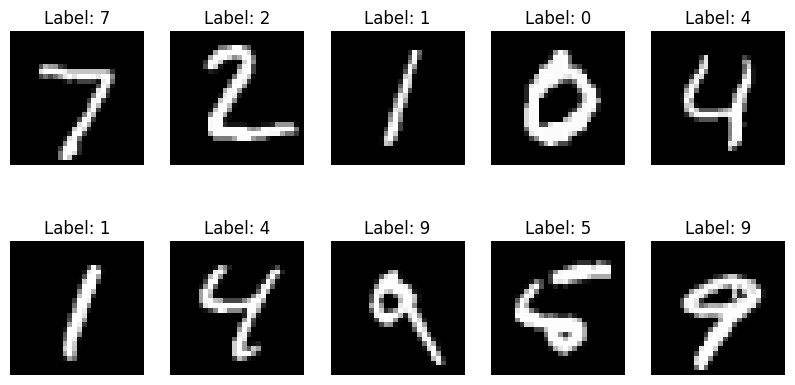

In [183]:
# visualize the data
import matplotlib.pyplot as plt

# Function to display a grid of images with labels
def visualize_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')  # Hide axis
    plt.show()

# Visualize the first 10 images and labels from the dataset
visualize_images(train_images, train_labels, num_images=10)



In [184]:
#Assume i have pre-processing
y = [0,0,0,0,0,1,1,1,1,1,]
num_classes = len(set(y))

In [185]:
# Function to preprocess the image dataset
from sklearn.model_selection import train_test_split
def preprocess_images(images, labels, target_size=(28, 28), test_size=0.2):
    # 1. Rescale image data to [0, 1]
    images = images.astype('float32') / 255.0

    # 2. Add a channel dimension (grayscale images will have 1 channel)
    images = np.expand_dims(images, axis=-1)  # shape becomes (num_images, rows, cols, 1)

    # 3. Resize images to target size (if necessary)
    images_resized = np.array([tf.image.resize(image, target_size).numpy() for image in images])

    # 4. Split dataset into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(images_resized, labels, test_size=test_size, random_state=42)

    # 5. One-hot encode the labels (if needed for classification tasks)
    Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=np.max(labels) + 1)
    Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=np.max(labels) + 1)

    return X_train, X_test, Y_train, Y_test


In [186]:
# Verify the shape after preprocessing
X_train, X_test, Y_train, Y_test = preprocess_images(train_images, train_labels)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(8000, 28, 28, 1) (8000, 10) (2000, 28, 28, 1) (2000, 10)


In [187]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [188]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

num_classes = 10  # Number of classes (e.g., for MNIST, num_classes=10)
model = Sequential()

# Input layer and Flatten layer
model.add(Flatten(input_shape=(28, 28, 1)))  # Flatten the image data

# Hidden layer with 128 units
model.add(Dense(128, activation='relu'))

# Output layer with 10 units (for 10 classes)
model.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [189]:
model.compile(metrics=['accuracy'], optimizer='adam', loss='categorical_crossentropy')

In [190]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [191]:
#model.fit(X_train,Y_train, batch_size=64,epochs = 10)
history= model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6748 - loss: 1.1360 - val_accuracy: 0.8940 - val_loss: 0.3575
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9095 - loss: 0.2975 - val_accuracy: 0.9125 - val_loss: 0.2993
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9375 - loss: 0.2245 - val_accuracy: 0.9320 - val_loss: 0.2399
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9504 - loss: 0.1728 - val_accuracy: 0.9380 - val_loss: 0.2214
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9599 - loss: 0.1511 - val_accuracy: 0.9400 - val_loss: 0.2095
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9685 - loss: 0.1151 - val_accuracy: 0.9455 - val_loss: 0.1985
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9756 - loss: 0.0962 - val_accuracy: 0.9395 - val_loss: 0.2042
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9789 - loss: 0.0831 - val_accuracy:

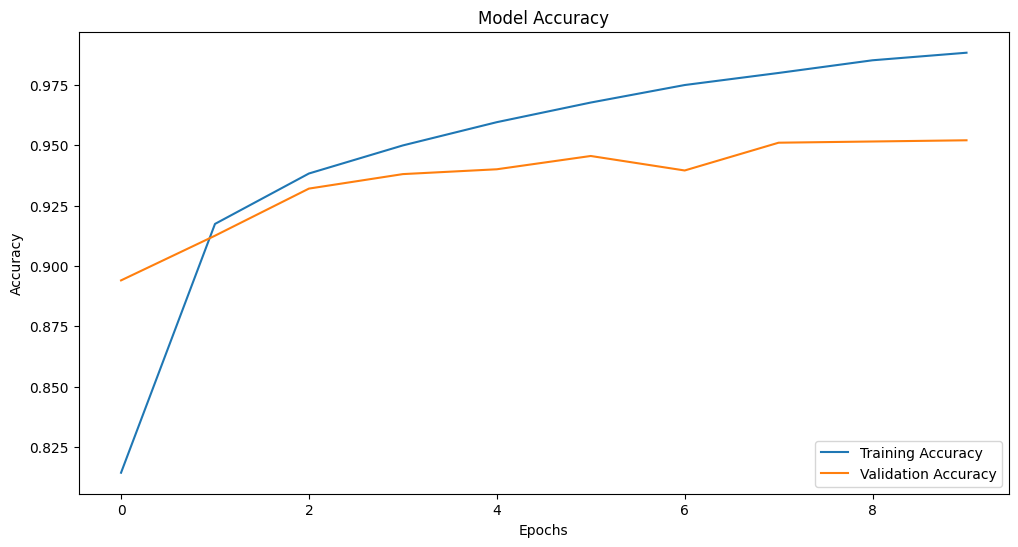

In [192]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [193]:
model.save('my_model.h5')

In [194]:
#model.predict()
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved model
model = load_model('my_model.h5')

# Example input data (ensure it's preprocessed the same way as during training)
# For MNIST, input data should have shape (None, 28, 28, 1) and normalized
sample_input = np.random.rand(1, 28, 28, 1)  # Replace with real data

# Make predictions
predictions = model.predict(sample_input)

# Output the predictions
print("Raw Predictions:", predictions)
print("Predicted Class:", np.argmax(predictions, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Raw Predictions: [[3.4434724e-08 1.4596002e-07 7.1755654e-01 4.0992603e-02 7.6993078e-18
  2.4143615e-01 9.5815480e-09 1.3571356e-05 9.8785847e-07 4.7238868e-10]]
Predicted Class: [2]


In [195]:
#model.load()
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_model.h5')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


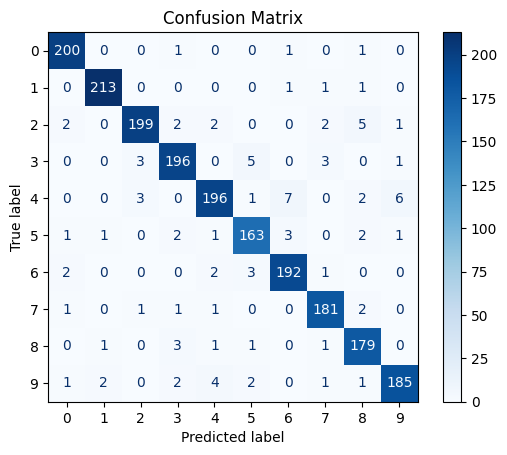

In [196]:
#model.summary()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generate predictions for test data
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


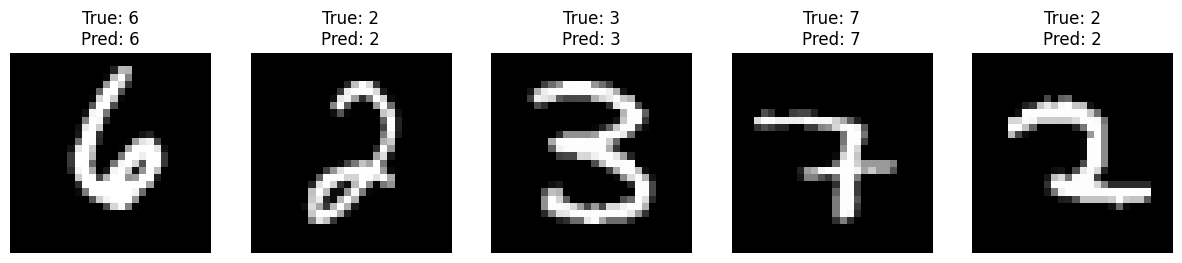

In [197]:
# Plot a few examples with predictions
num_samples = 5
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(Y_test[i])}\nPred: {Y_pred_classes[i]}")
    plt.axis('off')
plt.show()


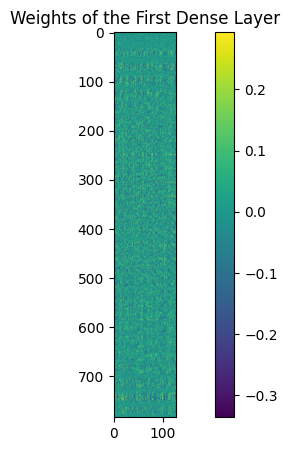

In [198]:
# Extract weights from the first Dense layer
weights, biases = model.layers[1].get_weights()

plt.figure(figsize=(10, 5))
plt.imshow(weights, cmap='viridis')
plt.colorbar()
plt.title("Weights of the First Dense Layer")
plt.show()
